In [77]:

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

Matplotlib is building the font cache; this may take a moment.


In [78]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [66]:

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [67]:

index_3 =np.where( y == "3" )[0]
index_7= np.where( y == "7" )[0]

In [68]:
indeces = np.concatenate((index_3,index_7))

In [69]:
X=X[indeces]
y=y[indeces]
X.shape

(14434, 784)

In [79]:

# Randomize the data
random_state = check_random_state(0)

permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

In [80]:
# Split to Train & Test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

In [81]:
# scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [82]:
# create model
clf = LogisticRegression(
    C=50. / 5000, penalty='l2', solver='saga', tol=0.1
)

In [83]:
# cross validation
results = []
names = []

kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True) #10 groups each group of 12 rows(4 samples for each class) 
cv_results = cross_val_score(clf, X_train, y_train, cv=kfold, scoring='accuracy')
	
print(' %f (%f)' % ( cv_results.mean(), cv_results.std()))

0.978263 (0.004858)


In [84]:
# create model and Test it
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)

print("Test score with L2 penalty: %.4f" % score)

Test score with L2 penalty: 0.9803


Confusion Matrix
[[0.97368421 0.02631579]
 [0.01350439 0.98649561]]


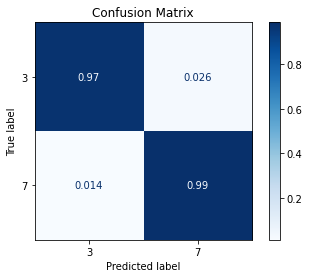

In [89]:
# Confusion Matrix
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
disp.ax_.set_title("Confusion Matrix")

print("Confusion Matrix")
print(disp.confusion_matrix)